In [1]:
import os
os.environ['OCEANDATA']='/lustre/fswork/projects/rech/omr/ufk69pe/'


In [34]:
import sys
#from DiffusionModel import DiffusionModel
from configs.base_config import TrainingConfig, TOCETrainingConfig
#import torch
from utils import get_dataloader, compute_laplacian
from tqdm import tqdm
import matplotlib.pyplot as plt

config = TrainingConfig()

In [65]:
config.train_batch_size = 8 ####### 8 
train_dataloader = get_dataloader(config.data_file, batch_size=config.train_batch_size, fields=config.fields)
config.data_shape = train_dataloader.get_data_shape()

Reading infos in /lustre/fswork/projects/rech/omr/ufk69pe/Dino-Fusion/dino_1_4_degree_coarse_130924.tar


In [66]:
image = next(iter(train_dataloader))

In [67]:
image.shape

torch.Size([8, 37, 208, 64])

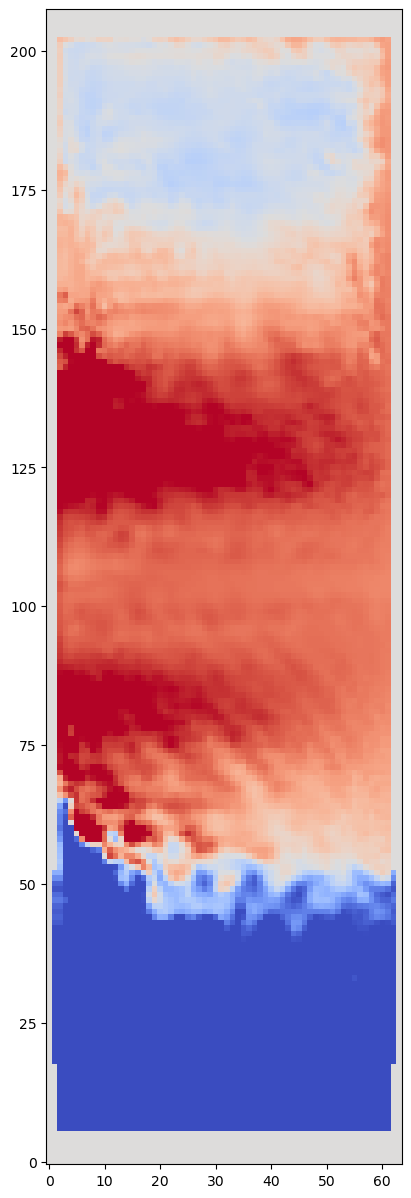

In [68]:
plt.figure(figsize=(10, 15))
plt.imshow(image[0,-1,:,:], cmap='coolwarm', origin='lower', vmax=1, vmin=-1)

### example of laplacian of SSH

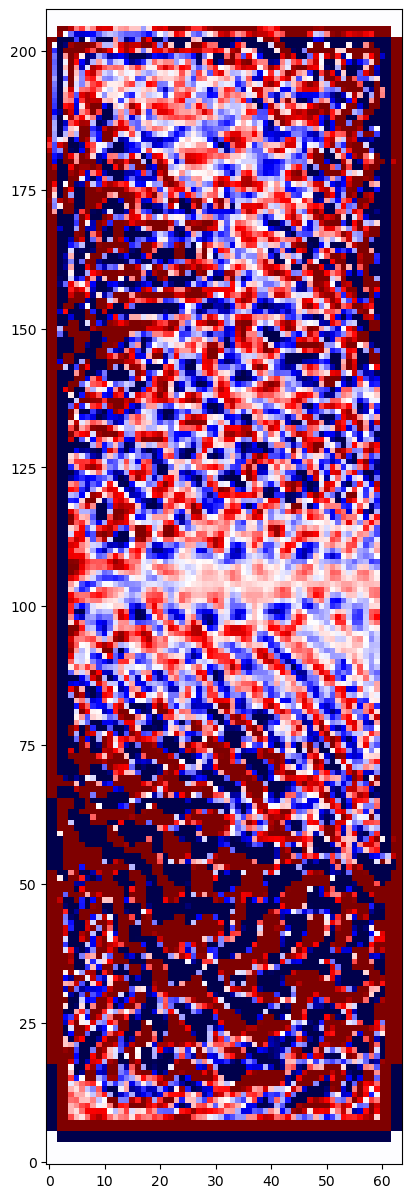

In [69]:
plt.figure(figsize=(10, 15))
plt.imshow(compute_laplacian(image[0,-1,:,:]), cmap='seismic', origin='lower', vmax=0.05, vmin=-0.05)

In [70]:
import matplotlib.pyplot as plt
import numpy as np

In [71]:
results = np.load('/gpfswork/rech/omr/udu91zn/diffusionmodels/diffModel_experiences/z87envpm/epoch_4900.npy')
results.shape

(8, 37, 208, 64)

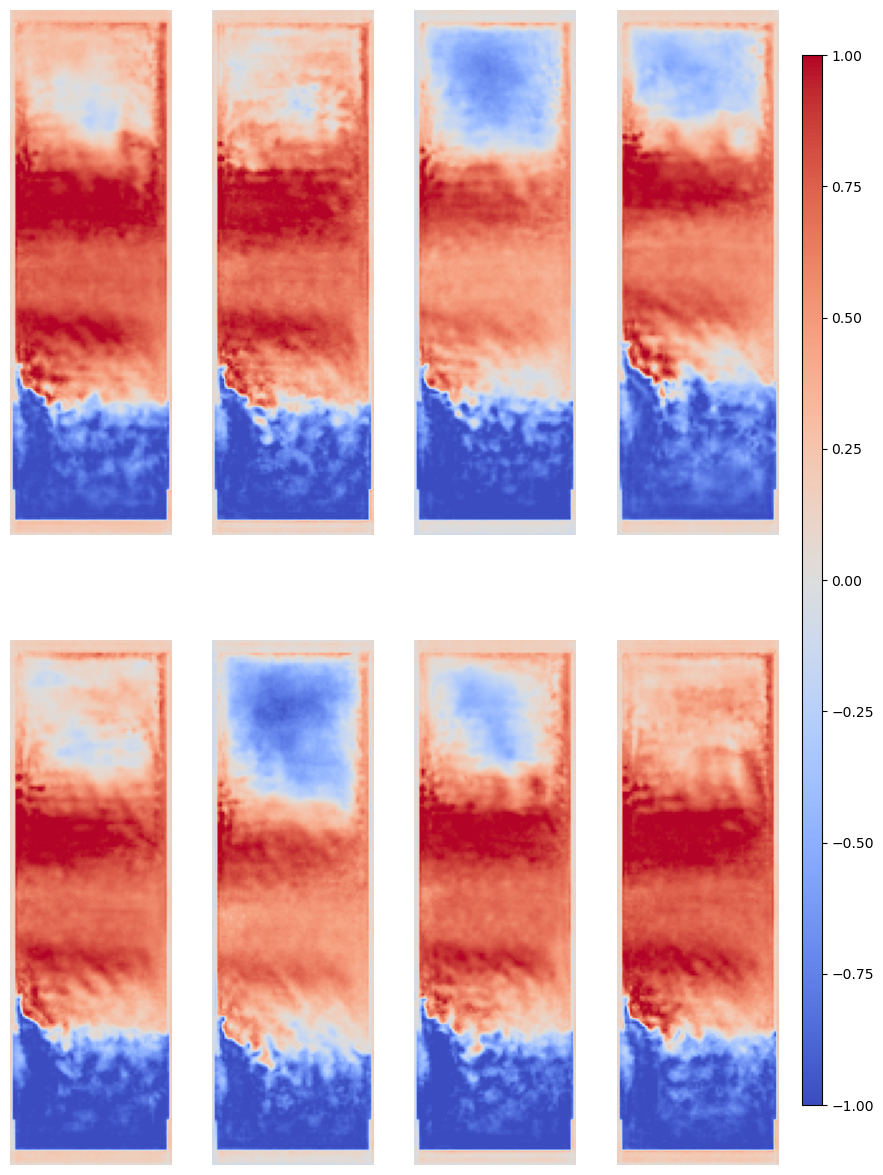

In [73]:
fig, axs = plt.subplots(2, 4, figsize=(10, 15))

for i in range(8):
    ax = axs[i // 4, i % 4]
    cax = ax.imshow(results[i, -1], origin='lower', cmap='coolwarm', vmin=-1, vmax=1)
    ax.axis('off')  # Hide the axis

# Create an axis for the colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Adjust position and size of colorbar

# Use the last image to set the colorbar with limits
fig.colorbar(cax, cax=cbar_ax)

#plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for colorbar
plt.show()

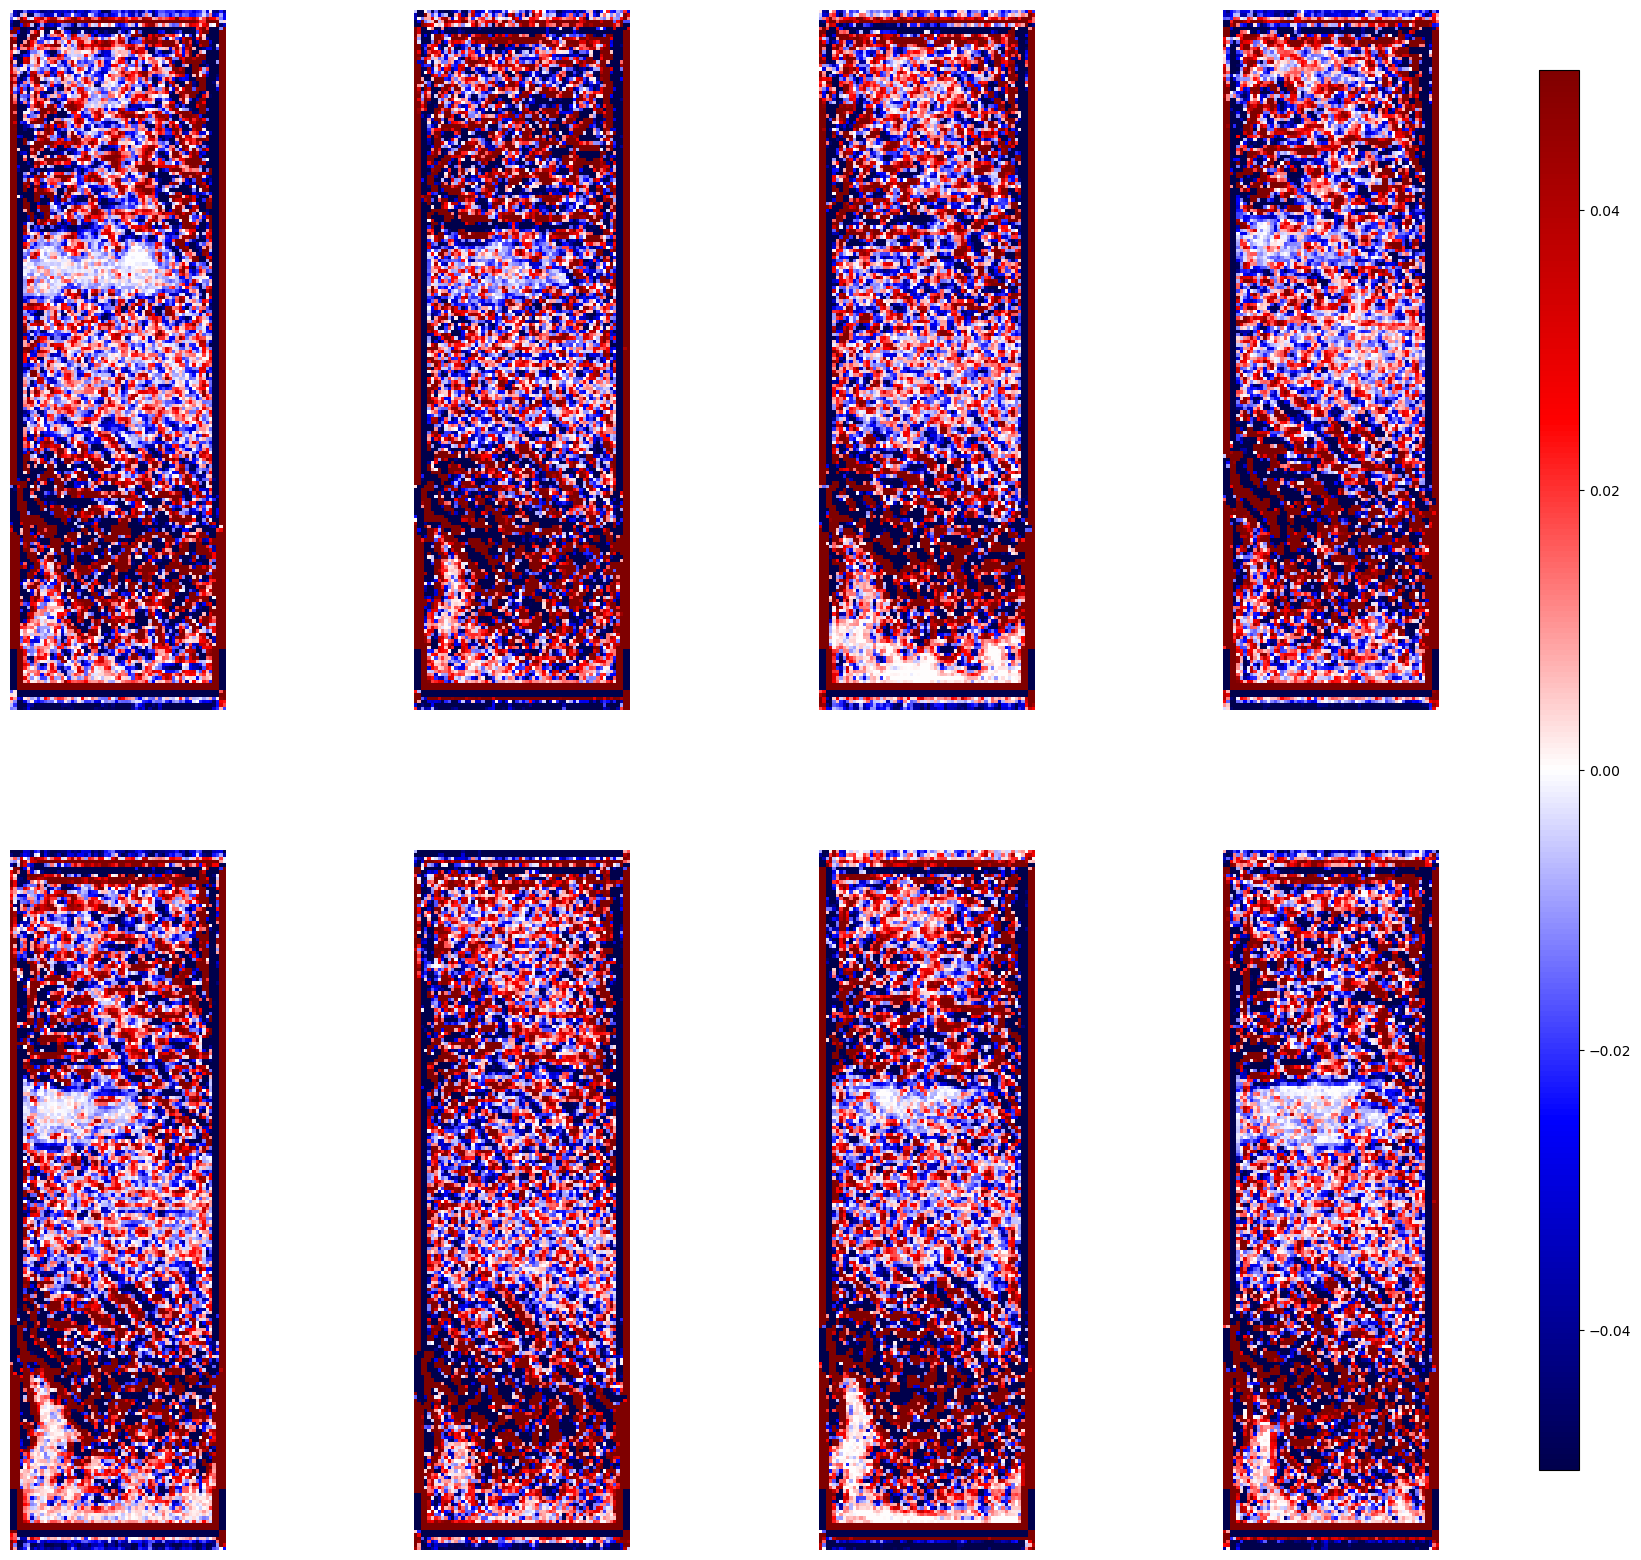

In [74]:
fig, axs = plt.subplots(2, 4, figsize=(20, 20))
laplacians = []

for i in range(8):
    image = results[i, -1]
    laplacian = compute_laplacian(image)
    laplacians.append(laplacian)

    ax = axs[i // 4, i % 4]
    cax = ax.imshow(laplacian, cmap='seismic', origin='lower', vmax=0.05, vmin=-0.05)
    ax.axis('off')  # Hide the axis

# Create an axis for the colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Adjust position and size of colorbar

# Use the last image to set the colorbar
fig.colorbar(cax, cax=cbar_ax)

plt.show()

In [3]:
#inputs = torch.rand(1, 37, 128, 128)

In [7]:
#r = diffusion.denoiser(inputs, torch.tensor([0.5]))

In [4]:
#from diffusers import UNet2DModel


In [15]:
#model = UNet2DModel(
#        sample_size=(128, 128),  # the target image resolution
#        in_channels= 37,   # the number of input channels, 3 for RGB images
#        out_channels= 37,  # the number of output channels
#        layers_per_block= 2,  # how many ResNet layers to use per UNet block
#        block_out_channels= (128, 128, 256, 256, 512, 512),  # the number of output channels for each UNet block
#        down_block_types=(
#            "DownBlock2D",  # a regular ResNet downsampling block
#            "DownBlock2D",
#            "DownBlock2D",
#            "AttnDownBlock2D",
#            "AttnDownBlock2D",  # a ResNet downsampling block with spatial self-attention
#            "AttnDownBlock2D",
#        ),
#        up_block_types=(
#            "AttnUpBlock2D",  # a regular ResNet upsampling block
#            "AttnUpBlock2D",  # a ResNet upsampling block with spatial self-attention
#            "AttnUpBlock2D",
#            "UpBlock2D",
#            "UpBlock2D",
#            "UpBlock2D",
#        ),
#    )

In [16]:
#model(inputs, torch.tensor([1])).sample.shape

torch.Size([1, 37, 128, 128])

wandb: Network error (ConnectionError), entering retry loop.
